# Generate wind history

Generate a wind history for demonstration using the example FLORIS model

In [1]:
import floris.layout_visualization as layoutviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from floris import FlorisModel

## Parameters

In [2]:
dt = 1.0  # [s]
N = 1000  # number of time steps
delay = 5  # [s]

In [3]:
# Read in the FLORIS model
fmodel = FlorisModel("inputs/floris_input.yaml")

## Show the layout

Text(0.5, 1.0, 'Example farm layout')

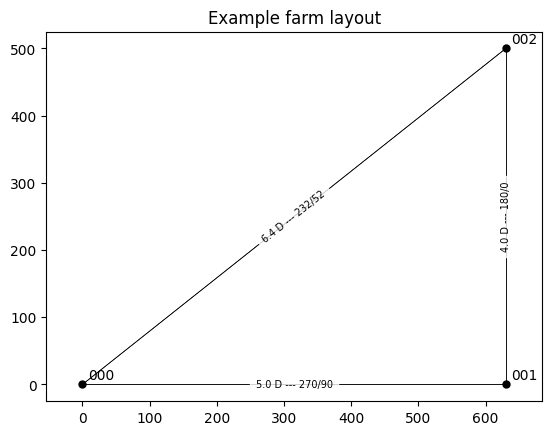

In [4]:
fig, ax = plt.subplots()
layoutviz.plot_turbine_points(fmodel, ax=ax)
layoutviz.plot_turbine_labels(fmodel, ax=ax)
layoutviz.plot_waking_directions(fmodel, ax=ax)
ax.set_title("Example farm layout")

## Generate the histories

Text(0.5, 0, 'Time step')

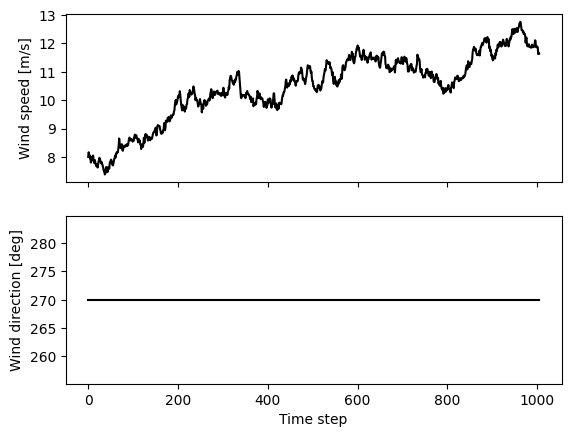

In [5]:
# Set random seed
np.random.seed(1)

# Generate overall winds speeds and directions using random walks
ws_u_inf = 8.0 * np.ones(N + delay)
wd_inf = 270.0 * np.ones(N + delay)

for i in range(1, N + delay):
    # Add a small perturbation
    ws_u_inf[i] = ws_u_inf[i - 1] + 0.1 * np.random.randn()
    # wd_inf[i] = wd_inf[i - 1] + 1.0 * np.random.randn()

    # Limit the ranges
    if ws_u_inf[i] < 0.0:
        ws_u_inf[i] = 0.0
    if ws_u_inf[i] > 13.0:
        ws_u_inf[i] = 13.0
    if wd_inf[i] < 0.0:
        wd_inf[i] = 360.0 + wd_inf[i]
    if wd_inf[i] > 360.0:
        wd_inf[i] = wd_inf[i] - 360.0

# Plot the histories
fig, axarr = plt.subplots(2, 1, sharex=True)
axarr[0].plot(ws_u_inf, color="k")
axarr[0].set_ylabel("Wind speed [m/s]")
axarr[1].plot(wd_inf, color="k")
axarr[1].set_ylabel("Wind direction [deg]")
axarr[1].set_xlabel("Time step")

## Convert to individual turbine histories

Text(0.5, 0, 'Time step')

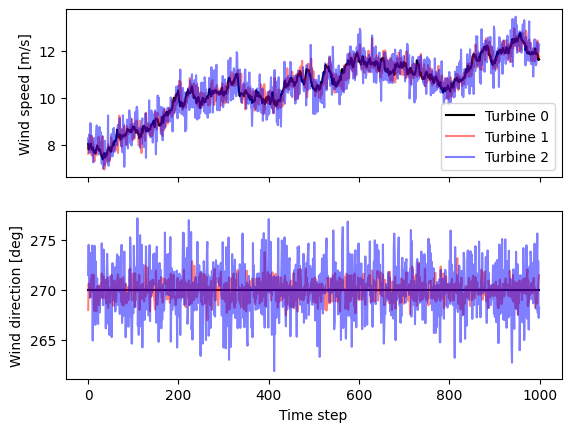

In [6]:
# Set turbine 0 history equal to original
ws_0 = ws_u_inf[delay:]
wd_0 = wd_inf[delay:]

# Set turbine 1,2 history delayed and with added noise
ws_1 = ws_u_inf[:N] + 0.25 * np.random.randn(N)
wd_1 = wd_inf[:N] + 1.0 * np.random.randn(N)
ws_2 = ws_u_inf[:N] + 0.5 * np.random.randn(N)
wd_2 = wd_inf[:N] + 2.5 * np.random.randn(N)

# Plot the seperate turbine histories
fig, axarr = plt.subplots(2, 1, sharex=True)
axarr[0].plot(ws_0, color="k", label="Turbine 0")
axarr[0].plot(ws_1, color="r", label="Turbine 1", alpha=0.5)
axarr[0].plot(ws_2, color="b", label="Turbine 2", alpha=0.5)
axarr[0].set_ylabel("Wind speed [m/s]")
axarr[0].legend()
axarr[1].plot(wd_0, color="k", label="Turbine 0")
axarr[1].plot(wd_1, color="r", label="Turbine 1", alpha=0.5)
axarr[1].plot(wd_2, color="b", label="Turbine 2", alpha=0.5)
axarr[1].set_ylabel("Wind direction [deg]")
axarr[1].set_xlabel("Time step")

## Add histories to dataframe and save as csv

In [7]:
df = pd.DataFrame(
    {
        "Timestamp": pd.date_range(start="1/1/2020", periods=N, freq="1s"),
        "wd_000": wd_0,
        "wd_001": wd_1,
        "wd_002": wd_2,
        "ws_000": ws_0,
        "ws_001": ws_1,
        "ws_002": ws_2,
    }
)
df.to_csv("inputs/wd_ws.csv", index=False)